In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

In [2]:
file_name = r'C:\Users\kyt95\OneDrive\문서\GitHub\PLT_NOx/BACK_DATA_2HOURS_12_r0.xlsx'
#file_name = r'C:\Users\kyt95\OneDrive\문서\GitHub\PLT_NOx/BACK_DATA_2HOURS_34_r0.xlsx'
df = pd.read_excel(file_name)

c:\users\kyt95\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


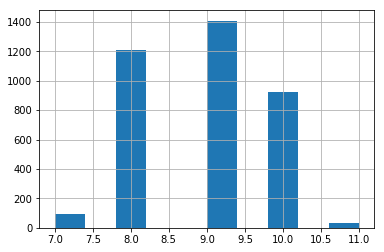

In [3]:
df2 = df.loc[(df["2O2"] < 6.6) & (df["2O2"] > 3.73) & (df["12NOx"] > 1)]
df2["dummy"] = np.ceil(df2["2O2"]/ .62)
df2["dummy"].hist()
plt.show()

In [4]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
print(sss)
for train_index, test_index in sss.split(df2, df2["dummy"]):
    sss_train_set = df2.loc[train_index]
    sss_test_set = df2.loc[test_index]

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


c:\users\kyt95\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
c:\users\kyt95\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [5]:
df2["dummy"].value_counts() / len(df2)

9.0     0.383860
8.0     0.329062
10.0    0.251636
7.0     0.025900
11.0    0.009542
Name: dummy, dtype: float64

In [6]:
sss_train_set["dummy"].value_counts() / len(sss_train_set)

9.0     0.378323
8.0     0.330948
10.0    0.251534
7.0     0.024199
11.0    0.009202
Name: dummy, dtype: float64

In [7]:
sss_test_set["dummy"].value_counts() / len(sss_test_set)

9.0     0.382834
8.0     0.321526
10.0    0.245232
7.0     0.032698
11.0    0.010899
Name: dummy, dtype: float64

In [8]:
for delete in (sss_train_set, sss_test_set):
    delete.drop("dummy",axis = 1, inplace=True)

In [10]:
corr_matrix1 = df2.corr()
corr_matrix1["12NOx"].sort_values(ascending=False)

12NOx        1.000000
2O2          0.759115
dummy        0.718392
12_1Cnv_T    0.444053
12_1BWT      0.441047
2FG_P        0.431497
PLT_Load     0.424205
1FG_P        0.399014
2FG_F        0.347679
1FG_F        0.320035
12_4BWT      0.246950
12_4Cnv_T    0.234871
12_3BWT      0.181648
12_3Cnv_T    0.157746
WAIT         0.151994
12_1P        0.130000
12_4P        0.099615
1O2          0.071452
12_2Cnv_T    0.065382
12_2BWT      0.062823
12STCKO2     0.061317
12_3P        0.028674
12_2P       -0.024636
12STCK_T    -0.140756
1RAD_P      -0.242795
2RAD_P      -0.285045
H2/HC       -0.308506
12MANI_P    -0.391359
2DT         -0.396807
1DT         -0.460211
12STCK_P    -0.756701
Name: 12NOx, dtype: float64

In [11]:
corr_matrix1 = sss_train_set.corr()
corr_matrix1["12NOx"].sort_values(ascending=False)

12NOx        1.000000
2O2          0.759630
2FG_P        0.449911
12_1Cnv_T    0.443604
12_1BWT      0.440551
PLT_Load     0.430027
1FG_P        0.395928
2FG_F        0.361031
1FG_F        0.312372
12_4BWT      0.230655
12_4Cnv_T    0.218397
12_3BWT      0.183117
WAIT         0.173153
12_3Cnv_T    0.158844
12_1P        0.137830
12_4P        0.112801
12STCKO2     0.095307
12_2Cnv_T    0.074725
12_2BWT      0.071935
1O2          0.046261
12_3P        0.041756
12_2P       -0.012503
12STCK_T    -0.140253
1RAD_P      -0.231908
2RAD_P      -0.276236
H2/HC       -0.319120
12MANI_P    -0.390763
2DT         -0.396356
1DT         -0.456922
12STCK_P    -0.757584
Name: 12NOx, dtype: float64

scatter_matrix(input1[list(input1.columns.values)], figsize = (90,60), c = input1["12NOx"], marker = "o", alpha = 0.3)
plt.show()

In [12]:
input = sss_train_set.copy()

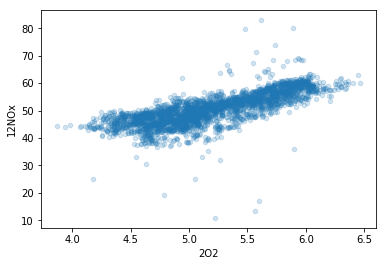

In [13]:
input.plot(kind="scatter", x = "2O2", y = "12NOx", alpha = 0.2)
plt.show()

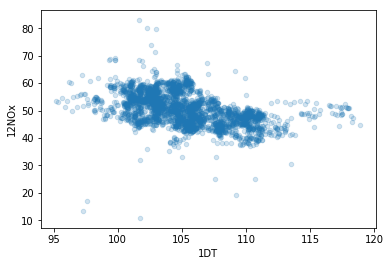

In [14]:
input.plot(kind="scatter", x = "1DT", y = "12NOx", alpha = 0.2)
plt.show()

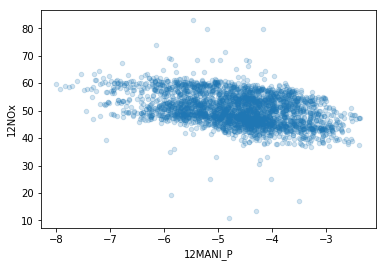

In [15]:
input.plot(kind="scatter", x = "12MANI_P", y = "12NOx", alpha = 0.2)
plt.show()

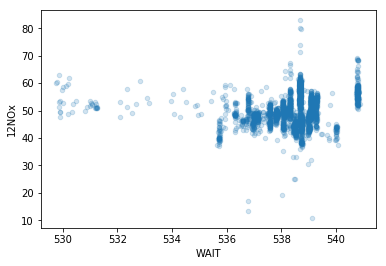

In [16]:
input.plot(kind="scatter", x = "WAIT", y = "12NOx", alpha = 0.2)
plt.show()

scatter_matrix(input[list(input.columns.values)],figsize = (240,160), alpha = 0.4, marker = 'o')
plt.savefig('foo.png')

In [26]:
scaler = preprocessing.MinMaxScaler()
#scaled_sss_train_set = scaler.fit_transform(sss_train_set)

In [29]:
lin_reg = LinearRegression()
lin_reg_fit(input1), 